In [81]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
import folium
import seaborn as sns
import glob


In [114]:
data = pd.read_csv('data/110002_esm.csv')

In [115]:
# All attributes
data.columns

Index(['ID', 'beep_time_start', 'beep_time_end', 'mood_well', 'mood_down',
       'mood_fright', 'mood_tense', 'phy_sleepy', 'phy_tired', 'mood_cheerf',
       'mood_relax', 'thou_concent', 'pat_hallu', 'loc_where', 'soc_who',
       'soc_who02', 'soc_who03', 'act_what', 'act_what02', 'act_what03',
       'act_problemless', 'mobility_well', 'sit_still', 'speech_well',
       'walk_well', 'tremor', 'slowness', 'stiffness', 'muscle_tension',
       'dyskinesia', 'sanpar_onoff', 'sanpar_medic', 'beep_disturb',
       'mor_sleptwell', 'mor_often_awake', 'mor_rested', 'mor_tired_phys',
       'mor_tired_ment', 'eve_many_offs', 'eve_long_offs', 'eve_walk_well',
       'eve_clothing', 'eve_eat_well', 'eve_personalcare', 'eve_household',
       'eve_tired'],
      dtype='object')

In [116]:
# limit the number of attributes of interest:
listOfAttributes = ['ID', 'beep_time_start', 'beep_time_end','tremor', 'slowness', 'stiffness', 'muscle_tension',
       'dyskinesia']
interest = ['tremor', 'slowness', 'stiffness', 'muscle_tension',
       'dyskinesia']

In [117]:
df_reduced = data[listOfAttributes]
df_reduced

,ID,beep_time_start,beep_time_end,tremor,slowness,stiffness,muscle_tension,dyskinesia
0,110002,2018-08-29 08:13:14,2018-08-29 08:16:51,4.0,4.0,4.0,4.0,3.0
1,110002,2018-08-29 10:56:18,2018-08-29 11:01:20,4.0,3.0,3.0,3.0,2.0
2,110002,2018-08-29 13:23:41,2018-08-29 13:28:20,4.0,3.0,4.0,4.0,5.0
3,110002,2018-08-29 15:12:33,2018-08-29 15:16:29,2.0,3.0,3.0,3.0,4.0
4,110002,2018-08-29 17:58:40,2018-08-29 18:02:37,3.0,3.0,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...
88,110002,2018-09-11 10:42:28,2018-09-11 10:45:42,2.0,2.0,2.0,2.0,3.0
89,110002,2018-09-11 13:10:26,2018-09-11 13:13:40,2.0,2.0,2.0,2.0,2.0
90,110002,2018-09-11 14:26:37,2018-09-11 14:29:48,2.0,3.0,3.0,3.0,2.0
91,110002,2018-09-11 17:17:32,2018-09-11 17:21:07,2.0,2.0,2.0,2.0,2.0


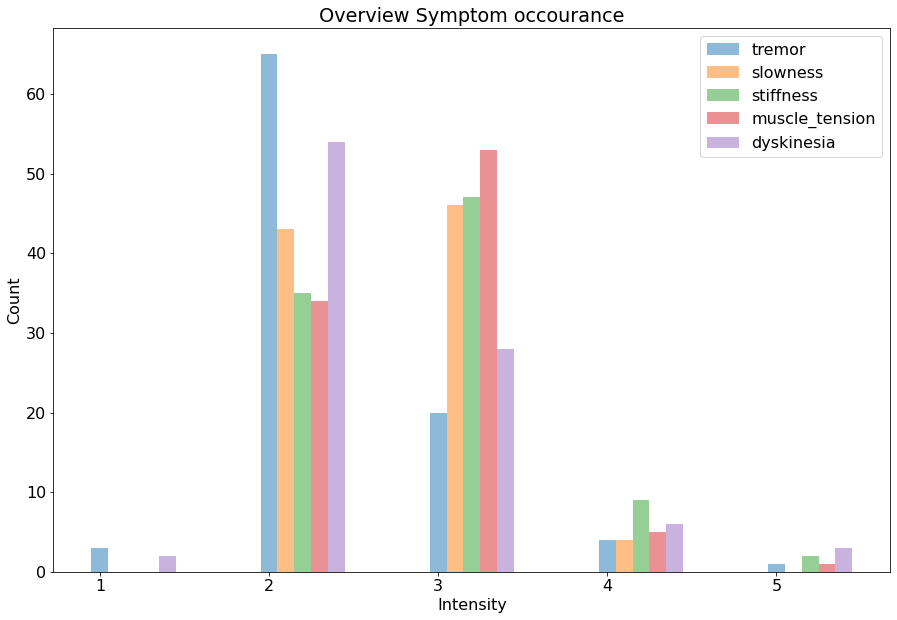

In [118]:
# Plotting the categories by the hour of day 
fig=plt.figure(figsize=(15,10))
j = 0
X = np.arange(4)
plt.rcParams['font.size'] = '16'
for i in interest:
    plt.bar(df_reduced[i].value_counts().sort_index().index+0.1*j , 
            df_reduced[i].value_counts().sort_index().values,
            alpha=0.5,linewidth = 0.1, width = 0.1)
    plt.xticks(rotation=0)
    j+=1
plt.legend(interest)
plt.xlabel('Intensity', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Overview Symptom occourance')
plt.savefig('data/110001_esm.png')

In [123]:
EMGAdata = pd.read_csv('data/EMA_data.csv')

### Plotting bar chart for all files
#### Overview of occourance 

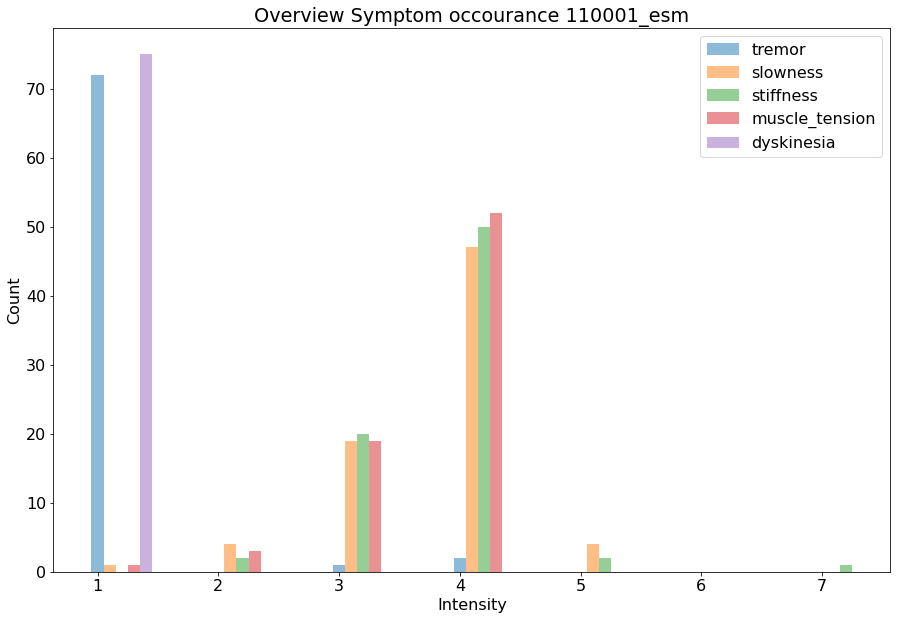

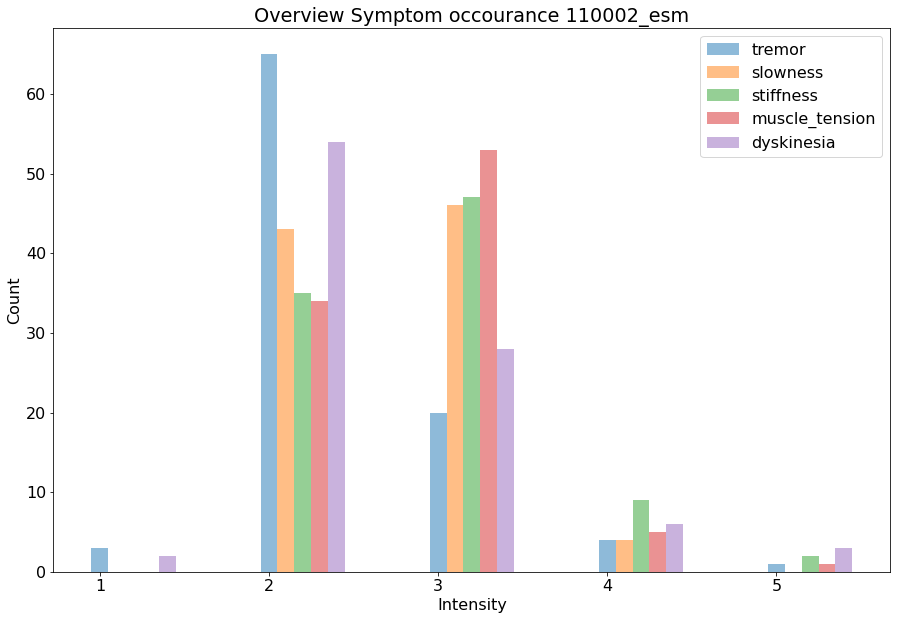

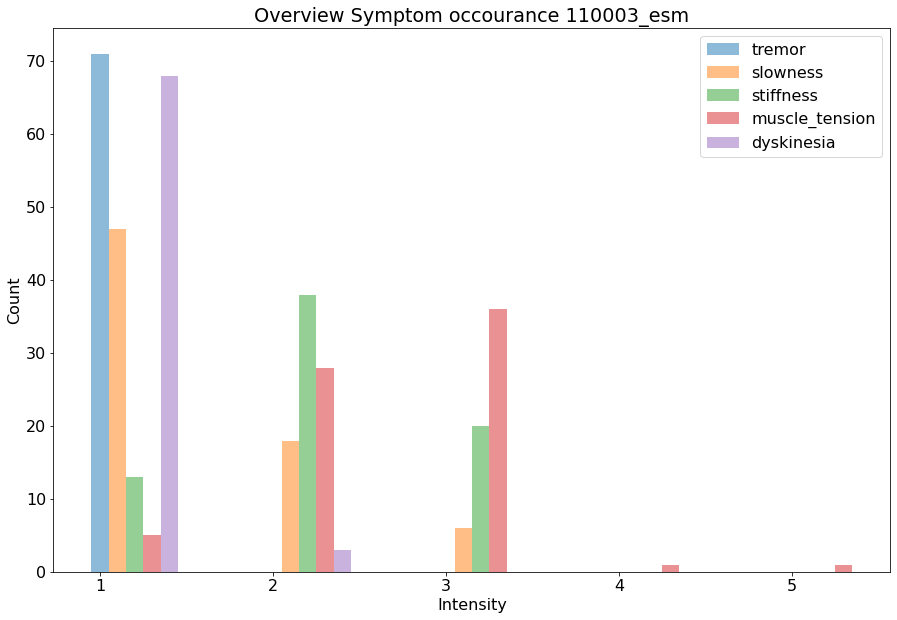

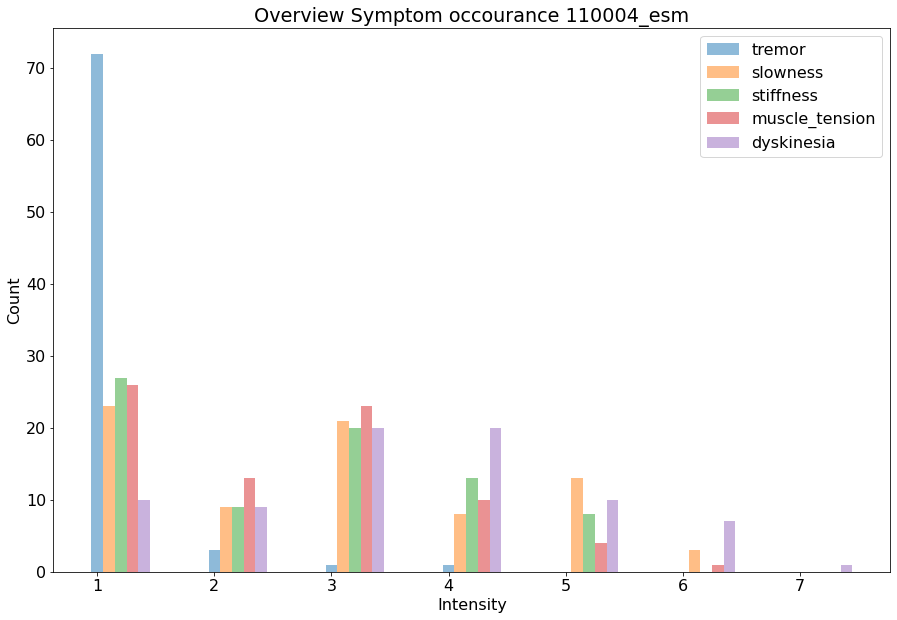

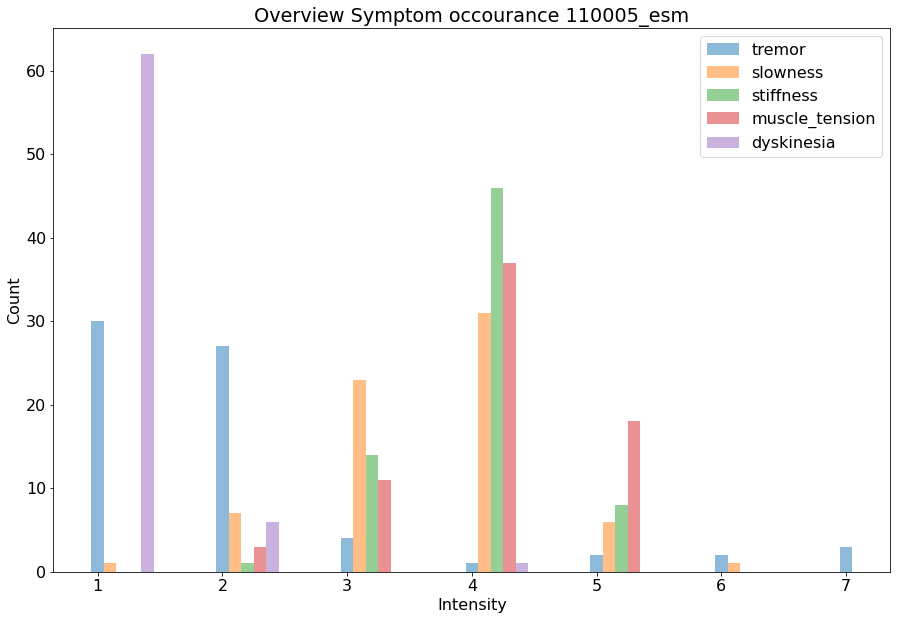

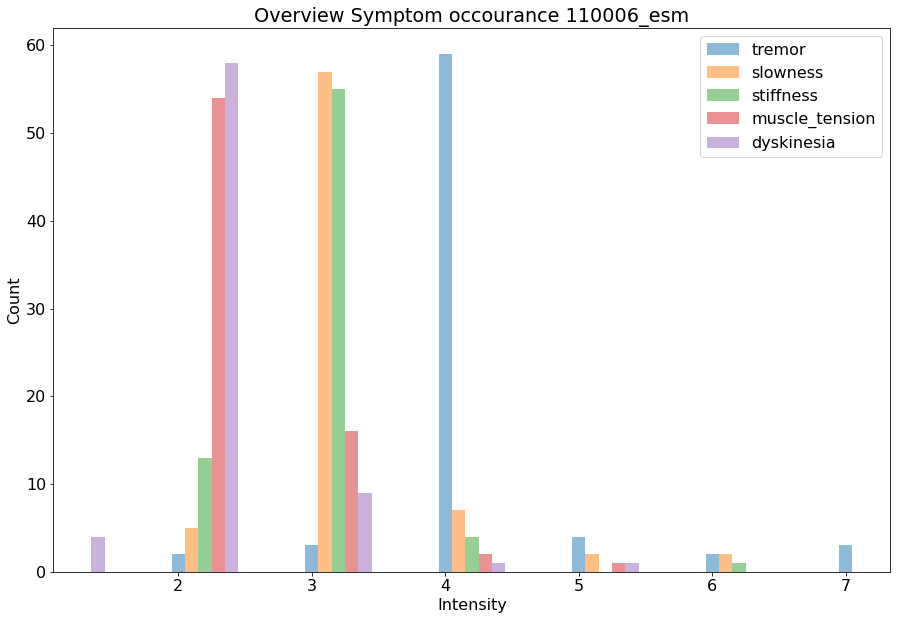

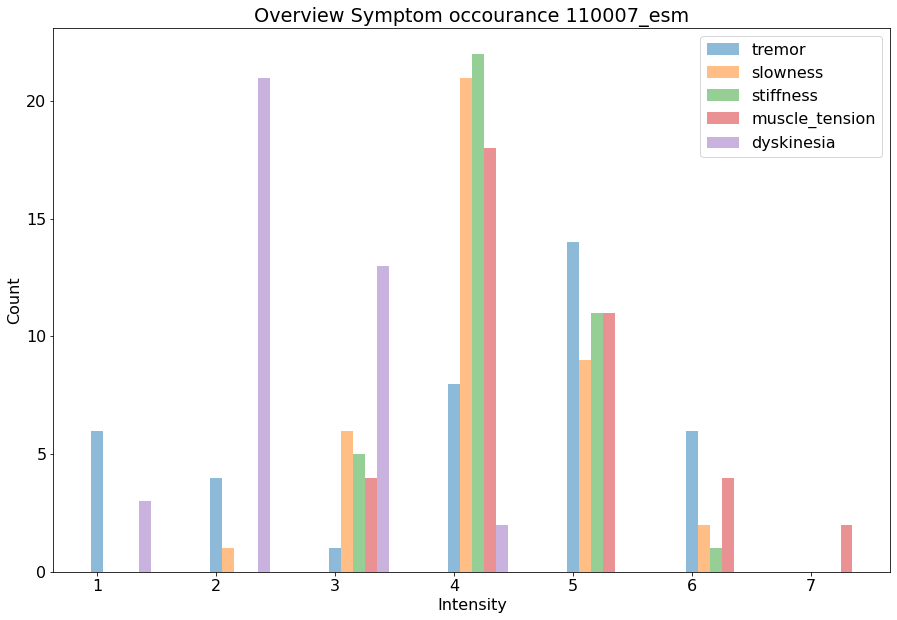

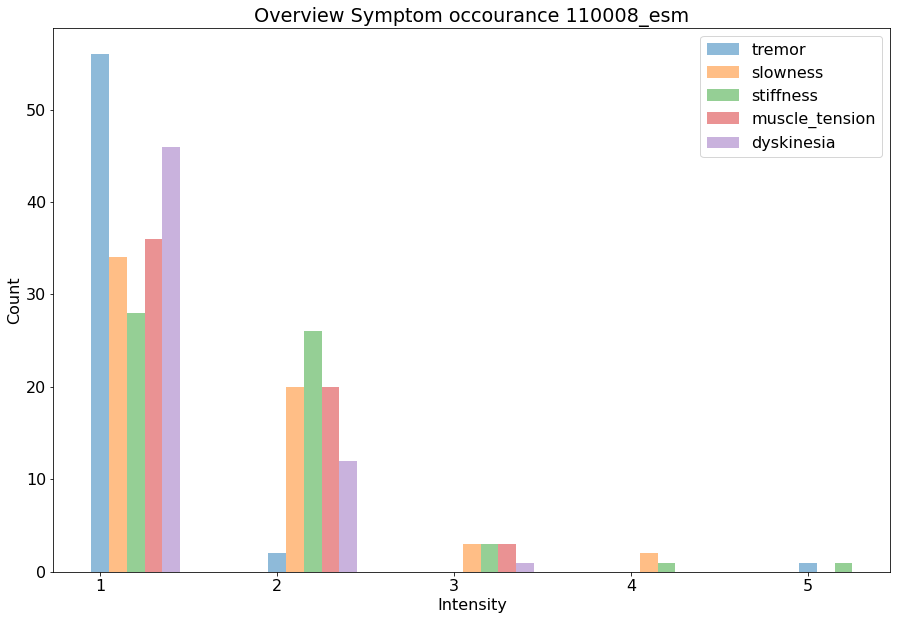

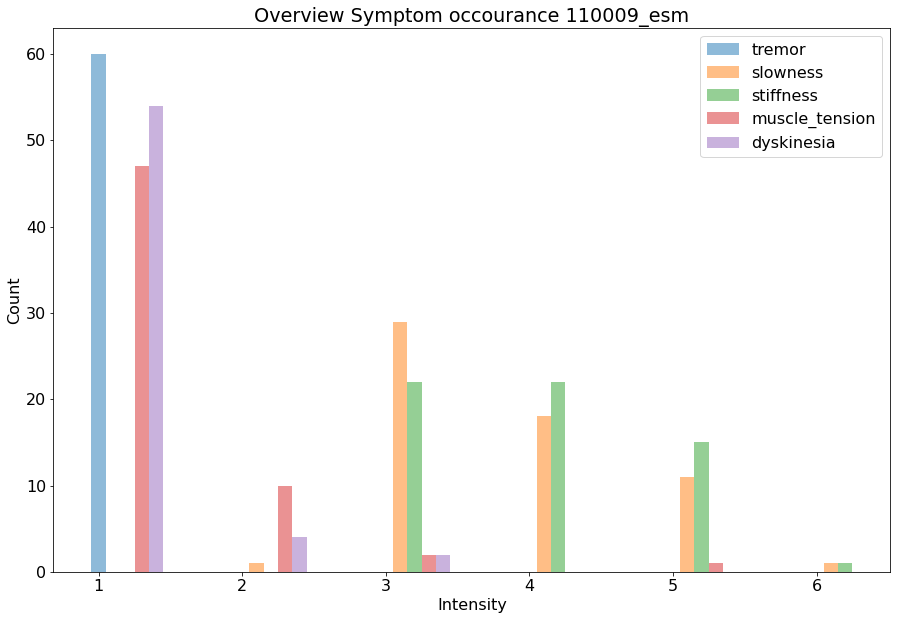

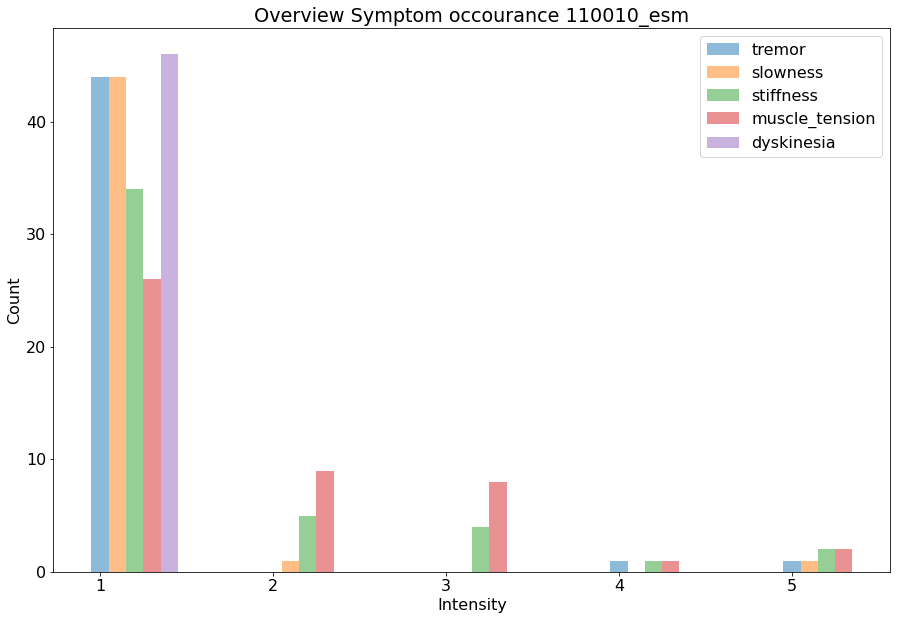

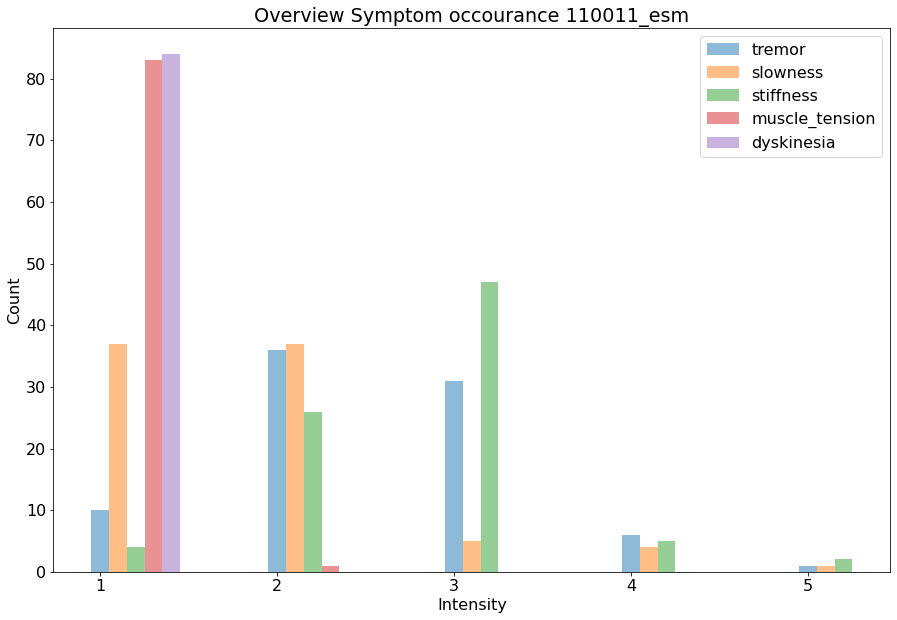

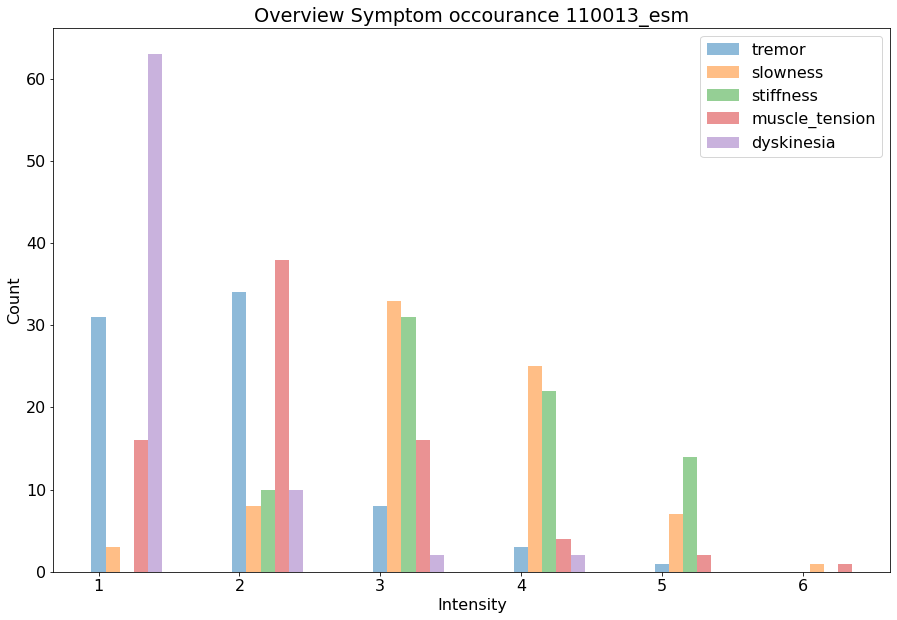

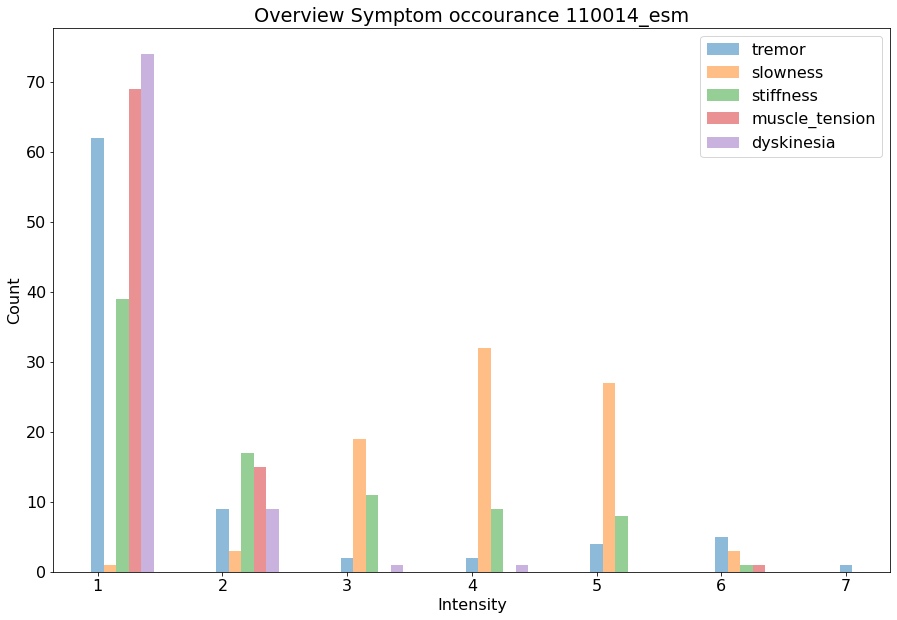

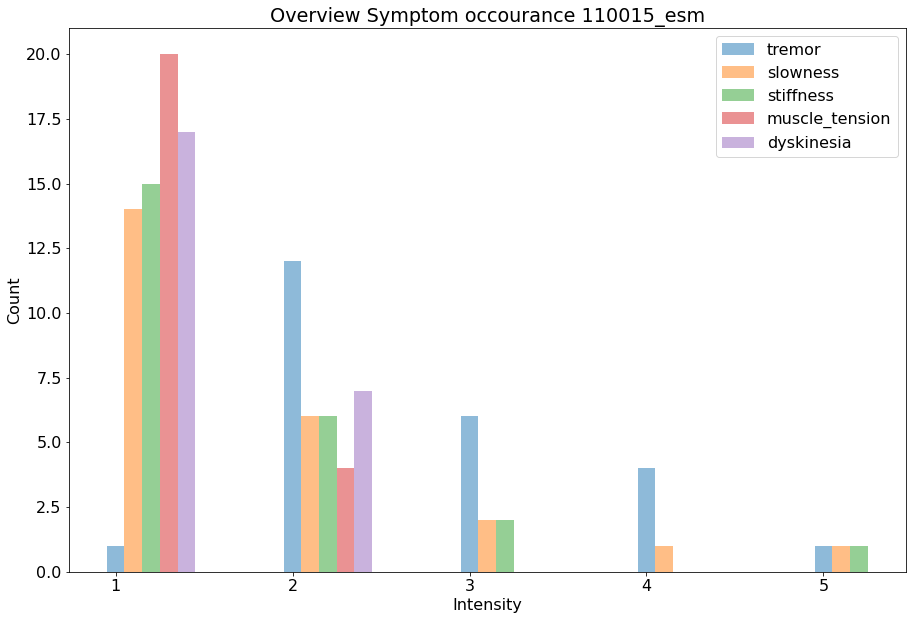

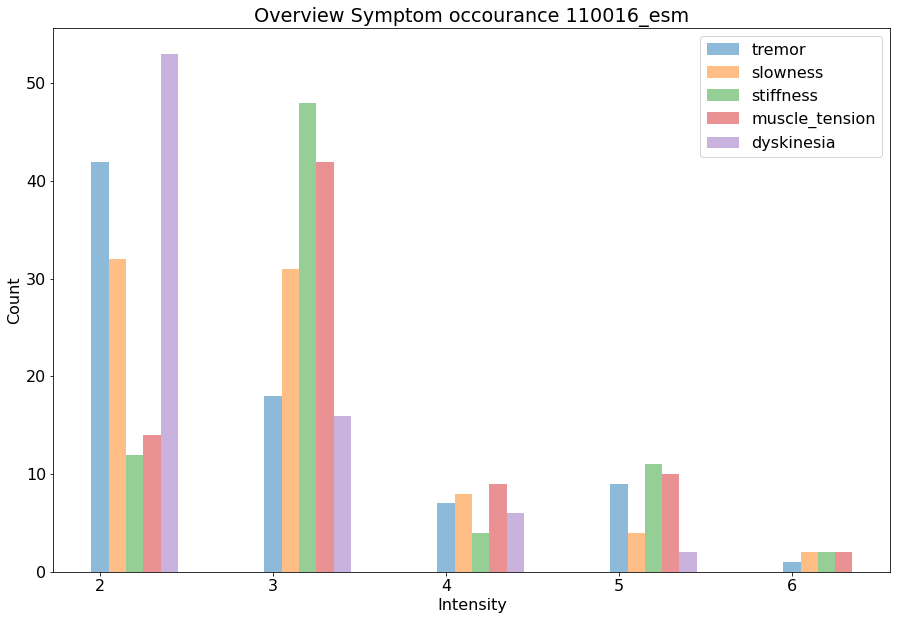

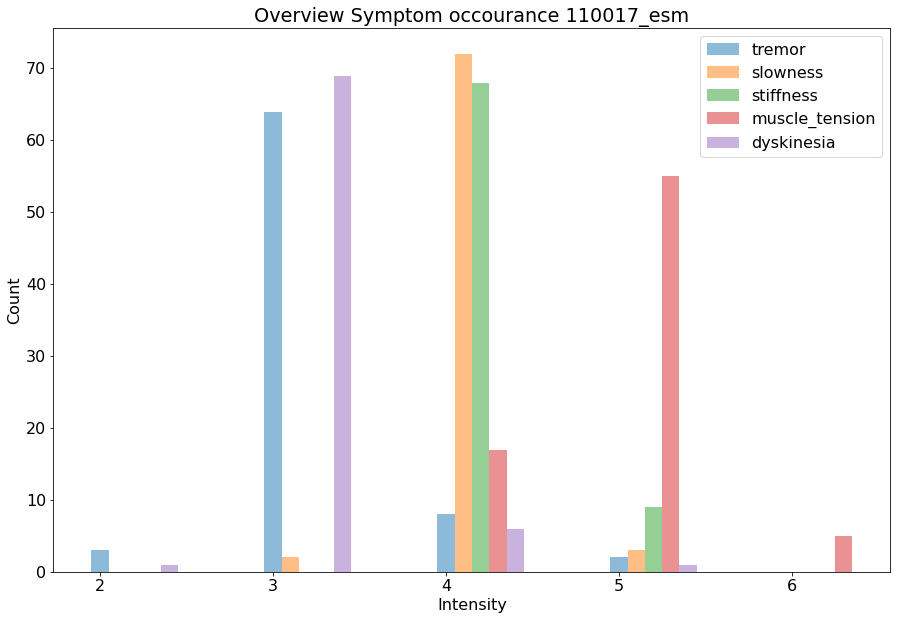

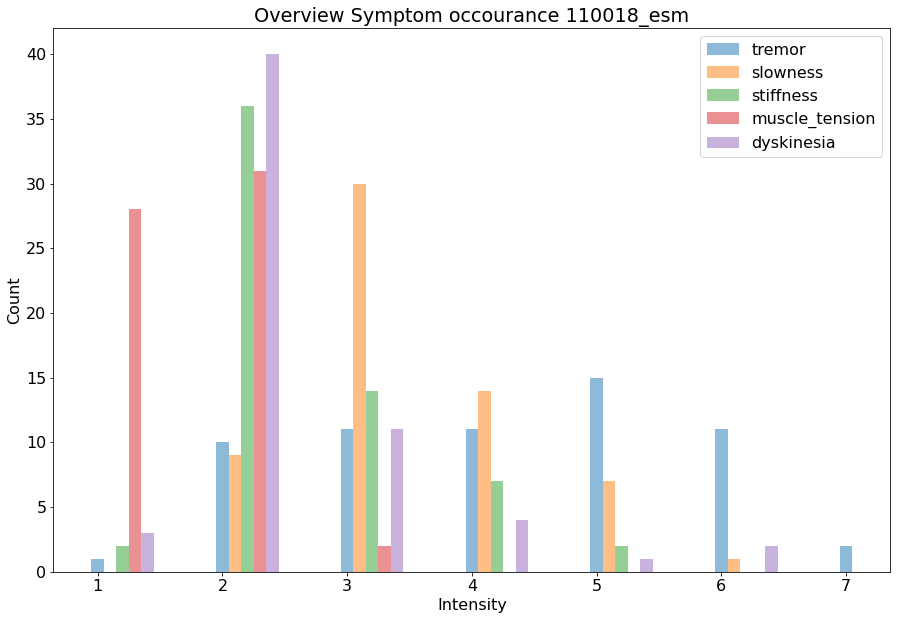

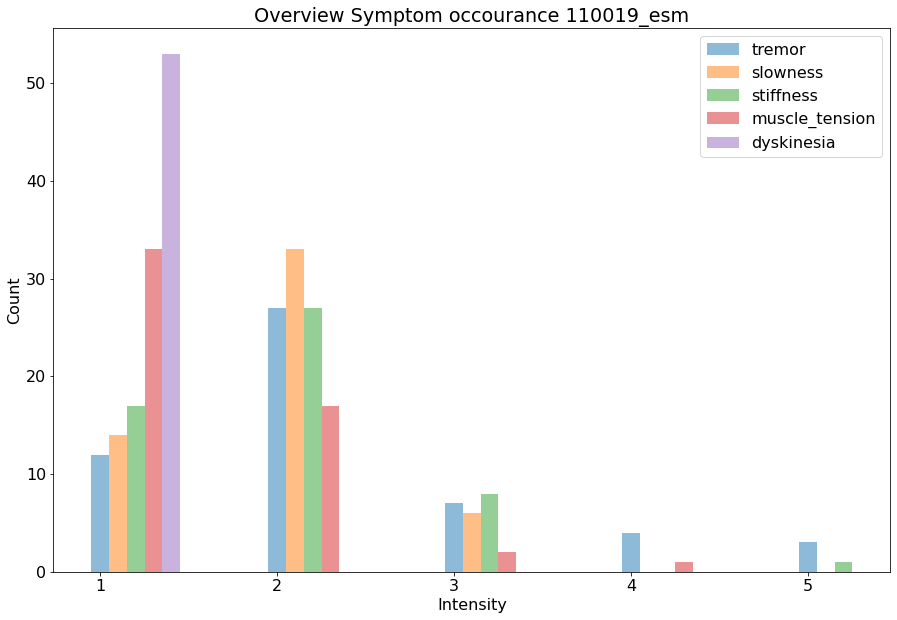

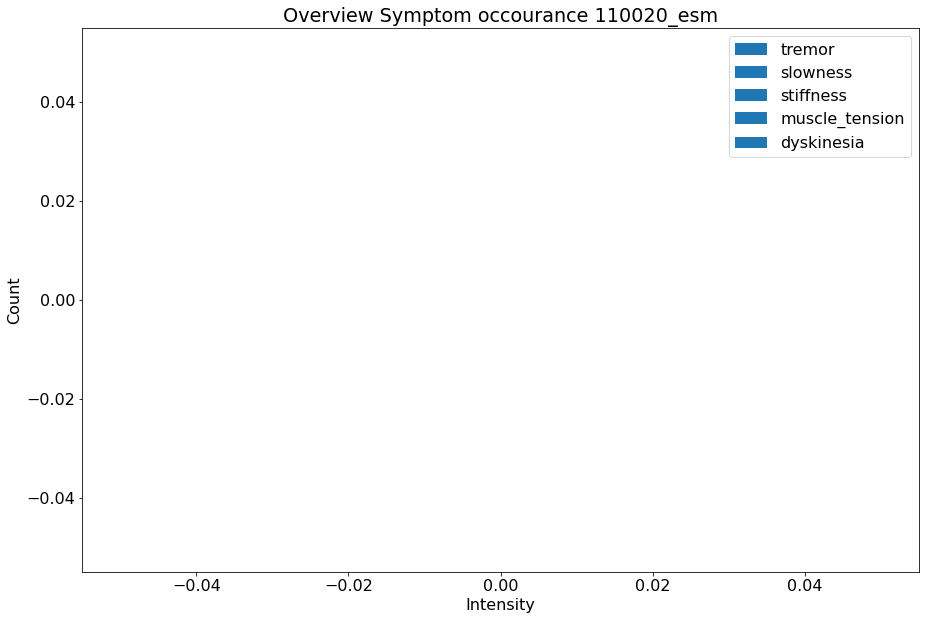

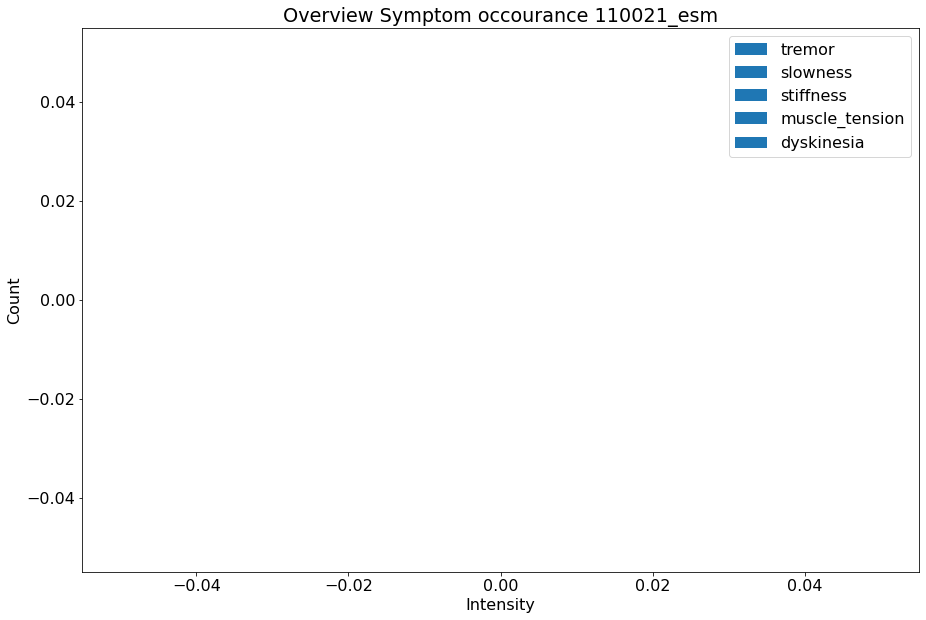

In [102]:
paths = glob.glob("data/1*.csv")

for ii in range(len(paths)):
    data = pd.read_csv(paths[ii])
    df_reduced = data[listOfAttributes]
    
    fig=plt.figure(figsize=(15,10))
    j = 0
    X = np.arange(4)
    plt.rcParams['font.size'] = '16'
    for i in interest:
        plt.bar(df_reduced[i].value_counts().sort_index().index+0.1*j , 
                df_reduced[i].value_counts().sort_index().values,
                alpha=0.5,linewidth = 0.1, width = 0.1)
        plt.xticks(rotation=0)
        j+=1
    plt.legend(interest)
    plt.xlabel('Intensity', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title('Overview Symptom occourance '+paths[ii][5:-4])
    fig.savefig(paths[ii][:-4]+'.png')

#### Overview of time of day 